In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

protoss_data = read_csv('../Output/ProtossFeb.csv', header=0, index_col=False)
display(protoss_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
0,1,World of Sleepers LE,us,437,P,T,0.0,1,0,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,0,0,0,0
1,1,World of Sleepers LE,us,437,P,T,310.8,480,30,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,0,0,0,0
2,1,World of Sleepers LE,us,437,P,T,366.8,960,60,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,0,0,0,0
3,1,World of Sleepers LE,us,437,P,T,296.8,1440,90,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,1,0,0,0
4,1,World of Sleepers LE,us,437,P,T,305.2,1920,120,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76362,3445,Eternal Empire LE,eu,768,P,T,291.2,14880,930,Player 2 - PtitDrogo (Protoss),...,8,0,0,1,1,0,8,0,10,0
76363,3445,Eternal Empire LE,eu,768,P,T,324.8,15360,960,Player 2 - PtitDrogo (Protoss),...,14,0,0,1,1,0,8,0,7,0
76364,3445,Eternal Empire LE,eu,768,P,T,280.0,15840,990,Player 2 - PtitDrogo (Protoss),...,14,0,0,1,1,0,8,0,9,0
76365,3445,Eternal Empire LE,eu,768,P,T,53.2,16320,1020,Player 2 - PtitDrogo (Protoss),...,12,0,0,1,1,0,8,0,12,0


In [2]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(protoss_data) if x not in no_normalize]

#Normalizing these columns
norm = protoss_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
protoss_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=protoss_data.index)

#One-hot Encoding the categorical variables
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['map_name'], prefix='Map'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['region'], prefix='Region'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(protoss_data_normalized.head(5), protoss_data_normalized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.099174,0.045685,0.032967,0.004451,0.000000,0.00000,0.000000,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,0.310056,0.107438,0.055838,0.032967,0.004451,0.170858,0.03750,0.001457,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
2,0.365922,0.123967,0.065990,0.050549,0.010237,0.203760,0.03125,0.007287,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,0.296089,0.148760,0.081218,0.050549,0.012017,0.223502,0.05000,0.013844,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
4,0.304469,0.157025,0.086294,0.050549,0.005786,0.210341,0.15000,0.015302,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
76362,0.290503,0.462810,0.558376,0.30989,0.044063,0.506463,0.15625,0.279073,0.215424,0.098810,...,0,0,0,0,1,0,0,0,1,0
76363,0.324022,0.462810,0.619289,0.30989,0.009792,0.519624,0.22500,0.292918,0.249819,0.102927,...,0,0,0,0,1,0,0,0,1,0
76364,0.279330,0.462810,0.675127,0.30989,0.011572,0.466980,0.21875,0.311862,0.264301,0.104300,...,0,0,0,0,1,0,0,0,1,0
76365,0.053073,0.454545,0.680203,0.30989,0.037832,0.473561,0.00000,0.334451,0.313179,0.110132,...,0,0,0,0,1,0,0,0,1,0
76366,0.000000,0.454545,0.395939,0.30989,0.051184,0.513043,0.00000,0.244827,0.090514,0.160567,...,0,0,0,0,1,0,0,0,1,0


In [3]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(protoss_data_normalized) if x not in no_X]

Y = protoss_data_normalized['win']
X_normalized = protoss_data_normalized[yes_X]

In [4]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

In [5]:
X_train = protoss_data_normalized[0:num_train]
X_val = protoss_data_normalized[num_train:(num_train + num_val)]
X_test = protoss_data_normalized[(num_val + num_train):]

In [6]:
Y_train.shape

(48875,)

In [7]:
X_train.shape

(48875, 124)

In [8]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=X_train, val_df=X_val, test_df=X_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [9]:
w1 = WindowGenerator(input_width=15, label_width=15, shift=1,
                     label_columns=['win'])
w1

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [10]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [11]:
import tensorflow as tf
tf.random.set_seed(1111)

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(X_normalized[:w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 16, 123)
Inputs shape: (1, 15, 123)
labels shape: (1, 15, 1)


In [12]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='win', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(20,15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time Step')

WindowGenerator.plot = plot

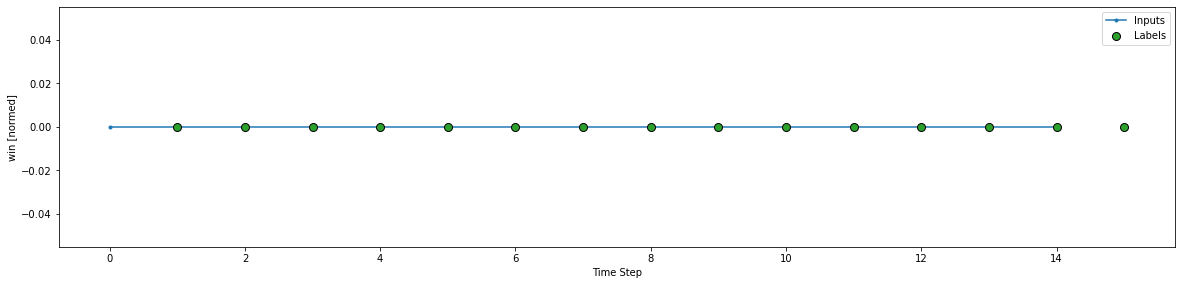

In [13]:
w1.example = example_inputs, example_labels
w1.plot()

In [14]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [15]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [16]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['win'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']

In [17]:
wide_window = WindowGenerator(
    input_width=15, label_width=15, shift=1,
    label_columns=['win'])

wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [18]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val)
  return history

In [19]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [20]:
val_performance = {}
performance = {}

history_linear = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(wide_window.val)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=0)

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
1527/1527 [=====================

Epoch 27/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0754 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9901 - val_loss: 0.0790 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9889
Epoch 28/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0754 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9901 - val_loss: 0.0790 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9888
Epoch 29/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0754 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9901 - val_loss: 0.0790 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9888
Epoch 30/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0754 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9902 - val_loss: 0.07

Epoch 57/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0753 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9902 - val_loss: 0.0790 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9890
Epoch 58/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0753 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9902 - val_loss: 0.0790 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9892
Epoch 59/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0753 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9902 - val_loss: 0.0790 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9889
Epoch 60/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0753 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9902 - val_loss: 0.07

Epoch 87/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0753 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9903 - val_loss: 0.0789 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9891
Epoch 88/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0753 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9903 - val_loss: 0.0789 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9892
Epoch 89/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0752 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9903 - val_loss: 0.0789 - val_binary_accuracy: 0.9842 - val_precision: 0.9841 - val_recall: 0.9842 - val_auc: 0.9891
Epoch 90/100
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0752 - binary_accuracy: 0.9846 - precision: 0.9848 - recall: 0.9848 - auc: 0.9903 - val_loss: 0.07

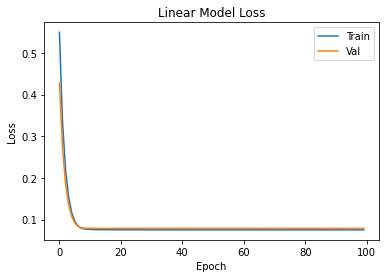

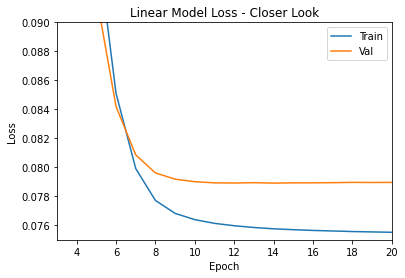

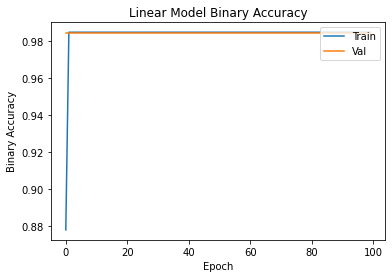

In [38]:
import matplotlib.pyplot as plt

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.075,0.09)
plt.xlim(3,20)
plt.show()

#Linear Model Binary Accuracy
plt.plot(history_linear.history['binary_accuracy'])
plt.plot(history_linear.history['val_binary_accuracy'])
plt.title('Linear Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


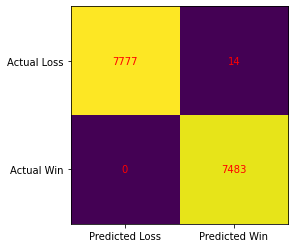

In [22]:
#Confusion matrix for Test set using Linear model 

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, linear.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

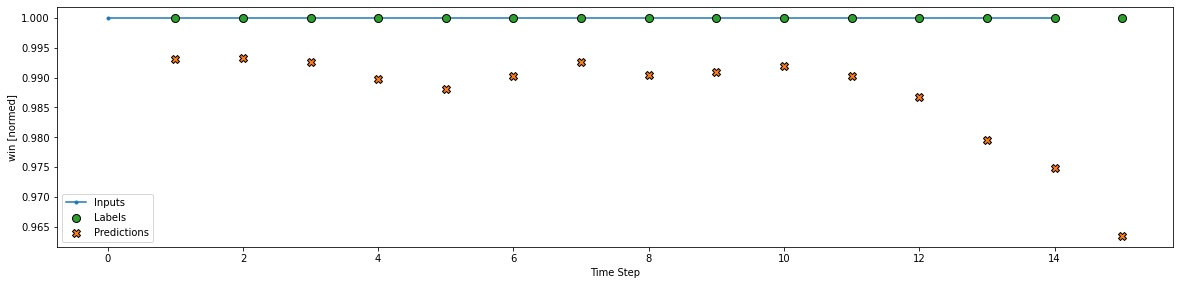

In [23]:
#Linear

wide_window.plot(linear)

In [24]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=131, activation='sigmoid'),
    tf.keras.layers.Dense(units=65, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

history_dense = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1527/1527 [==============================] - 4s 3ms/step - loss: 0.1723 - binary_accuracy: 0.9480 - precision_1: 0.9370 - recall_1: 0.9620 - auc_1: 0.9833 - val_loss: 0.0779 - val_binary_accuracy: 0.9838 - val_precision_1: 0.9833 - val_recall_1: 0.9842 - val_auc_1: 0.9883
Epoch 2/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0697 - binary_accuracy: 0.9846 - precision_1: 0.9847 - recall_1: 0.9850 - auc_1: 0.9899 - val_loss: 0.0654 - val_binary_accuracy: 0.9842 - val_precision_1: 0.9837 - val_recall_1: 0.9846 - val_auc_1: 0.9936
Epoch 3/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0530 - binary_accuracy: 0.9847 - precision_1: 0.9846 - recall_1: 0.9851 - auc_1: 0.9975 - val_loss: 0.0485 - val_binary_accuracy: 0.9842 - val_precision_1: 0.9841 - val_recall_1: 0.9842 - val_auc_1: 0.9981
Epoch 4/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0427 - binary_accuracy: 0.9846 - precision_1: 0.9848 - recall_1: 0

Epoch 30/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0253 - binary_accuracy: 0.9888 - precision_1: 0.9892 - recall_1: 0.9888 - auc_1: 0.9994 - val_loss: 0.0653 - val_binary_accuracy: 0.9748 - val_precision_1: 0.9731 - val_recall_1: 0.9765 - val_auc_1: 0.9964
Epoch 31/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0243 - binary_accuracy: 0.9895 - precision_1: 0.9898 - recall_1: 0.9895 - auc_1: 0.9995 - val_loss: 0.0694 - val_binary_accuracy: 0.9745 - val_precision_1: 0.9707 - val_recall_1: 0.9785 - val_auc_1: 0.9960
Epoch 32/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0232 - binary_accuracy: 0.9899 - precision_1: 0.9902 - recall_1: 0.9899 - auc_1: 0.9995 - val_loss: 0.0736 - val_binary_accuracy: 0.9741 - val_precision_1: 0.9719 - val_recall_1: 0.9763 - val_auc_1: 0.9957
Epoch 33/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0222 - binary_accuracy: 0.9905 - precision_1: 0.9907 - recall_

Epoch 59/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0043 - binary_accuracy: 0.9986 - precision_1: 0.9986 - recall_1: 0.9986 - auc_1: 1.0000 - val_loss: 0.2655 - val_binary_accuracy: 0.9630 - val_precision_1: 0.9668 - val_recall_1: 0.9586 - val_auc_1: 0.9807
Epoch 60/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0041 - binary_accuracy: 0.9986 - precision_1: 0.9987 - recall_1: 0.9986 - auc_1: 1.0000 - val_loss: 0.2645 - val_binary_accuracy: 0.9648 - val_precision_1: 0.9645 - val_recall_1: 0.9650 - val_auc_1: 0.9810
Epoch 61/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0039 - binary_accuracy: 0.9987 - precision_1: 0.9987 - recall_1: 0.9987 - auc_1: 1.0000 - val_loss: 0.2761 - val_binary_accuracy: 0.9639 - val_precision_1: 0.9632 - val_recall_1: 0.9643 - val_auc_1: 0.9802
Epoch 62/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0037 - binary_accuracy: 0.9987 - precision_1: 0.9987 - recall_

Epoch 88/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0020 - binary_accuracy: 0.9992 - precision_1: 0.9992 - recall_1: 0.9992 - auc_1: 1.0000 - val_loss: 0.3807 - val_binary_accuracy: 0.9625 - val_precision_1: 0.9647 - val_recall_1: 0.9599 - val_auc_1: 0.9753
Epoch 89/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0020 - binary_accuracy: 0.9992 - precision_1: 0.9992 - recall_1: 0.9992 - auc_1: 1.0000 - val_loss: 0.3809 - val_binary_accuracy: 0.9629 - val_precision_1: 0.9630 - val_recall_1: 0.9625 - val_auc_1: 0.9752
Epoch 90/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0020 - binary_accuracy: 0.9992 - precision_1: 0.9992 - recall_1: 0.9991 - auc_1: 1.0000 - val_loss: 0.3925 - val_binary_accuracy: 0.9630 - val_precision_1: 0.9635 - val_recall_1: 0.9622 - val_auc_1: 0.9748
Epoch 91/100
1527/1527 [==============================] - 4s 2ms/step - loss: 0.0018 - binary_accuracy: 0.9993 - precision_1: 0.9993 - recall_

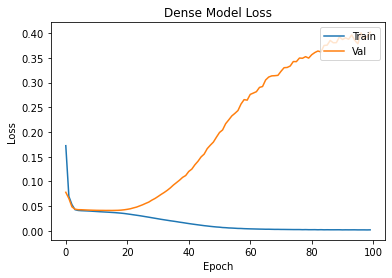

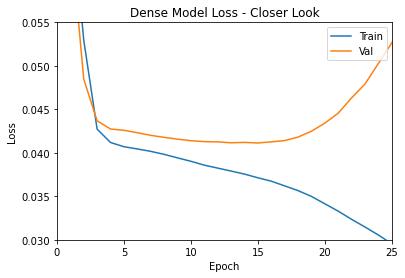

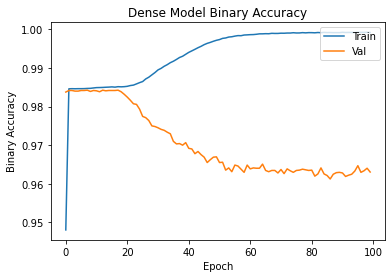

In [36]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.03,0.055)
plt.xlim(0,25)
plt.show()

#Dense Model Binary Accuracy
plt.plot(history_dense.history['binary_accuracy'])
plt.plot(history_dense.history['val_binary_accuracy'])
plt.title('Dense Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

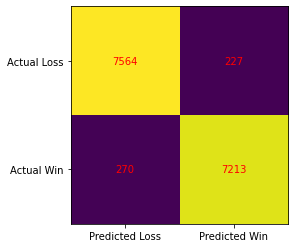

In [26]:
#Confusion matrix for Test set using Dense NN

cm = confusion_matrix(Y_test, dense.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

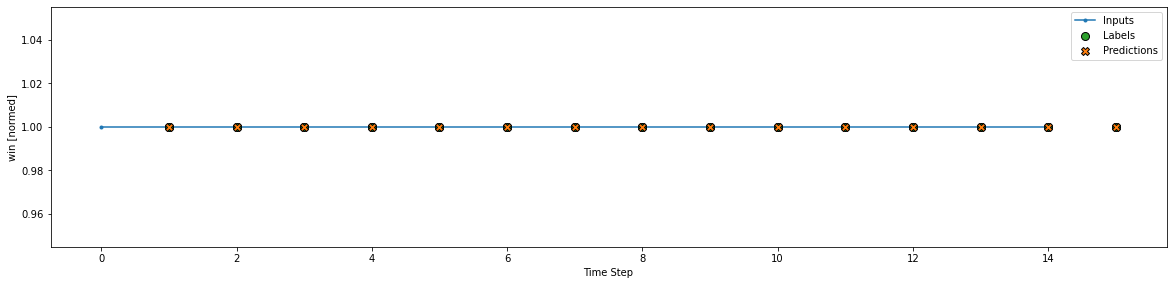

In [27]:
#Dense

wide_window.plot(dense)

In [28]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [29]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 15, 124)
Output shape: (32, 15, 1)


In [30]:
history_lstm = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1527/1527 [==============================] - 8s 5ms/step - loss: 0.1252 - binary_accuracy: 0.9701 - precision_2: 0.9681 - recall_2: 0.9730 - auc_2: 0.9893 - val_loss: 0.0703 - val_binary_accuracy: 0.9841 - val_precision_2: 0.9840 - val_recall_2: 0.9842 - val_auc_2: 0.9943
Epoch 2/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0532 - binary_accuracy: 0.9849 - precision_2: 0.9851 - recall_2: 0.9852 - auc_2: 0.9976 - val_loss: 0.0514 - val_binary_accuracy: 0.9835 - val_precision_2: 0.9828 - val_recall_2: 0.9841 - val_auc_2: 0.9981
Epoch 3/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0418 - binary_accuracy: 0.9857 - precision_2: 0.9859 - recall_2: 0.9859 - auc_2: 0.9986 - val_loss: 0.0475 - val_binary_accuracy: 0.9827 - val_precision_2: 0.9823 - val_recall_2: 0.9829 - val_auc_2: 0.9984
Epoch 4/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0364 - binary_accuracy: 0.9867 - precision_2: 0.9871 - recall_2: 0

Epoch 30/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0056 - binary_accuracy: 0.9981 - precision_2: 0.9981 - recall_2: 0.9980 - auc_2: 0.9999 - val_loss: 0.1477 - val_binary_accuracy: 0.9748 - val_precision_2: 0.9733 - val_recall_2: 0.9763 - val_auc_2: 0.9882
Epoch 31/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0054 - binary_accuracy: 0.9981 - precision_2: 0.9982 - recall_2: 0.9981 - auc_2: 0.9999 - val_loss: 0.1529 - val_binary_accuracy: 0.9736 - val_precision_2: 0.9762 - val_recall_2: 0.9708 - val_auc_2: 0.9881
Epoch 32/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0052 - binary_accuracy: 0.9982 - precision_2: 0.9982 - recall_2: 0.9982 - auc_2: 0.9999 - val_loss: 0.1552 - val_binary_accuracy: 0.9731 - val_precision_2: 0.9735 - val_recall_2: 0.9726 - val_auc_2: 0.9874
Epoch 33/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0051 - binary_accuracy: 0.9982 - precision_2: 0.9983 - recall_

Epoch 59/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0029 - binary_accuracy: 0.9990 - precision_2: 0.9990 - recall_2: 0.9990 - auc_2: 1.0000 - val_loss: 0.2043 - val_binary_accuracy: 0.9726 - val_precision_2: 0.9708 - val_recall_2: 0.9744 - val_auc_2: 0.9843
Epoch 60/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0027 - binary_accuracy: 0.9990 - precision_2: 0.9991 - recall_2: 0.9990 - auc_2: 1.0000 - val_loss: 0.2094 - val_binary_accuracy: 0.9713 - val_precision_2: 0.9717 - val_recall_2: 0.9707 - val_auc_2: 0.9839
Epoch 61/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0027 - binary_accuracy: 0.9990 - precision_2: 0.9991 - recall_2: 0.9990 - auc_2: 1.0000 - val_loss: 0.2081 - val_binary_accuracy: 0.9735 - val_precision_2: 0.9761 - val_recall_2: 0.9705 - val_auc_2: 0.9854
Epoch 62/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0028 - binary_accuracy: 0.9990 - precision_2: 0.9990 - recall_

Epoch 88/100
1527/1527 [==============================] - 7s 4ms/step - loss: 0.0018 - binary_accuracy: 0.9994 - precision_2: 0.9994 - recall_2: 0.9994 - auc_2: 1.0000 - val_loss: 0.2495 - val_binary_accuracy: 0.9705 - val_precision_2: 0.9658 - val_recall_2: 0.9753 - val_auc_2: 0.9825
Epoch 89/100
1527/1527 [==============================] - 7s 4ms/step - loss: 0.0017 - binary_accuracy: 0.9994 - precision_2: 0.9994 - recall_2: 0.9994 - auc_2: 1.0000 - val_loss: 0.2488 - val_binary_accuracy: 0.9713 - val_precision_2: 0.9713 - val_recall_2: 0.9712 - val_auc_2: 0.9826
Epoch 90/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0020 - binary_accuracy: 0.9993 - precision_2: 0.9993 - recall_2: 0.9993 - auc_2: 1.0000 - val_loss: 0.2400 - val_binary_accuracy: 0.9716 - val_precision_2: 0.9685 - val_recall_2: 0.9747 - val_auc_2: 0.9833
Epoch 91/100
1527/1527 [==============================] - 7s 4ms/step - loss: 0.0017 - binary_accuracy: 0.9994 - precision_2: 0.9994 - recall_

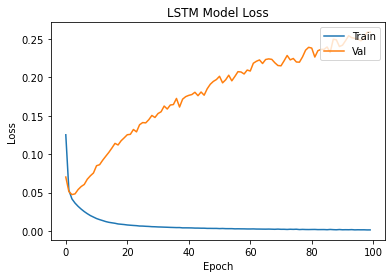

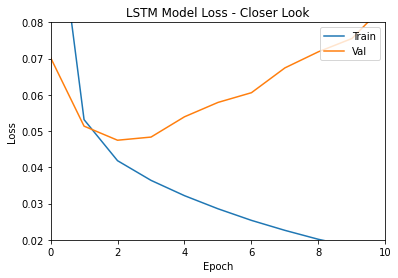

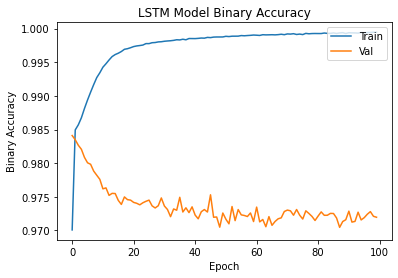

In [34]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.02,0.08)
plt.xlim(0,10)
plt.show()

#LSTM Model Binary Accuracy
plt.plot(history_lstm.history['binary_accuracy'])
plt.plot(history_lstm.history['val_binary_accuracy'])
plt.title('LSTM Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

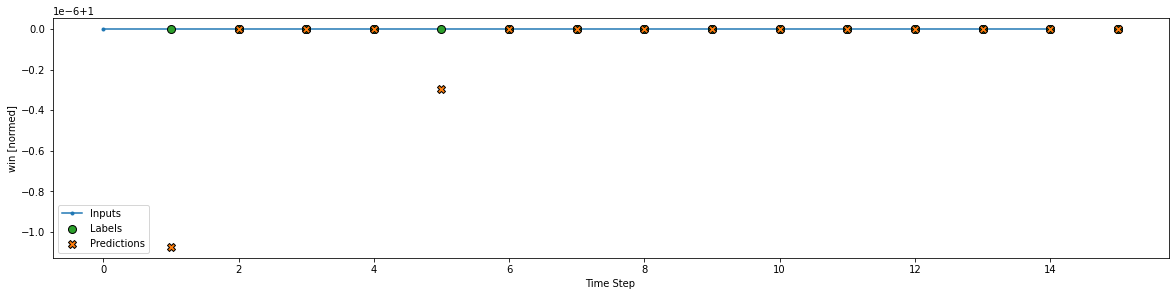

In [32]:
#LSTM

wide_window.plot(lstm_model)

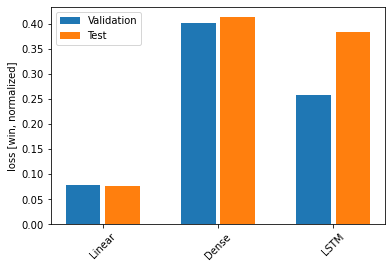

In [33]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, val_loss, width, label='Validation')
plt.bar(x + 0.17, test_loss, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()